# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Remove this
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 607


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
# #     city_url = url + "&q=" + city + "appid=" + weather_api_key + "&units=metric"
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
#     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#   Add 1 to the record count
    record_count += 1

    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
        print(weather_json)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city = weather_json["name"]
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]


        # Append the City information into city_data list
        city_dict = {"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}

        city_data.append(city_dict)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiszakecske
{'coord': {'lon': 20.1035, 'lat': 46.9326}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.07, 'feels_like': -5, 'temp_min': -4.89, 'temp_max': -0.99, 'pressure': 1022, 'humidity': 84, 'sea_level': 1022, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 20, 'gust': 2.4}, 'clouds': {'all': 88}, 'dt': 1705016253, 'sys': {'type': 2, 'id': 2004174, 'country': 'HU', 'sunrise': 1705040560, 'sunset': 1705072327}, 'timezone': 3600, 'id': 714754, 'name': 'Tiszakécske', 'cod': 200}
Processing Record 2 of Set 1 | crane
{'coord': {'lon': -102.3501, 'lat': 31.3974}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 16.54, 'feels_like': 14.69, 'temp_min': 16.54, 'temp_max': 16.54, 'pressure': 999, 'humidity': 17, 'sea_le

{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 25.03, 'feels_like': 25.63, 'temp_min': 25.03, 'temp_max': 25.03, 'pressure': 1014, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 110, 'gust': 11.83}, 'clouds': {'all': 75}, 'dt': 1705016255, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1704989224, 'sunset': 1705037181}, 'timezone': -36000, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
Processing Record 16 of Set 1 | edinburgh of the seven seas
{'coord': {'lon': -12.3116, 'lat': -37.0676}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 17.61, 'feels_like': 17.67, 'temp_min': 17.61, 'temp_max': 17.61, 'pressure': 1012, 'humidity': 86, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.76, 'deg': 327, 'gust': 4.25}, 'clouds': {'al

{'coord': {'lon': -69.0417, 'lat': -16.5656}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.79, 'feels_like': 10.72, 'temp_min': 11.79, 'temp_max': 11.79, 'pressure': 1012, 'humidity': 65, 'sea_level': 1012, 'grnd_level': 653}, 'visibility': 10000, 'wind': {'speed': 4.06, 'deg': 9, 'gust': 6.29}, 'clouds': {'all': 59}, 'dt': 1705016257, 'sys': {'country': 'PE', 'sunrise': 1704967950, 'sunset': 1705014892}, 'timezone': -18000, 'id': 3941492, 'name': 'Desaguadero', 'cod': 200}
Processing Record 30 of Set 1 | buka
{'coord': {'lon': 69.1986, 'lat': 40.8108}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.22, 'feels_like': 1.7, 'temp_min': 3.22, 'temp_max': 3.22, 'pressure': 1023, 'humidity': 85, 'sea_level': 1023, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 1.66, 'deg': 47, 'gust': 1.69}, 'clouds': {'all': 9

{'coord': {'lon': -97.8558, 'lat': 55.7435}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -25.91, 'feels_like': -31.42, 'temp_min': -25.91, 'temp_max': -25.91, 'pressure': 1026, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1705016259, 'sys': {'type': 1, 'id': 935, 'country': 'CA', 'sunrise': 1704984928, 'sunset': 1705011748}, 'timezone': -21600, 'id': 6165406, 'name': 'Thompson', 'cod': 200}
Processing Record 46 of Set 1 | tura
{'coord': {'lon': 90.2201, 'lat': 25.5198}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11.32, 'feels_like': 10.18, 'temp_min': 11.32, 'temp_max': 11.32, 'pressure': 1015, 'humidity': 64, 'sea_level': 1015, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 1.51, 'deg': 63, 'gust': 1.38}, 'clouds': {'all': 0}, 'dt': 1705016259, 'sys': {'

{'coord': {'lon': 55.2919, 'lat': -20.9373}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 24.28, 'feels_like': 24.72, 'temp_min': 21.95, 'temp_max': 26, 'pressure': 1012, 'humidity': 75, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.23, 'deg': 94, 'gust': 2.92}, 'clouds': {'all': 12}, 'dt': 1705016261, 'sys': {'type': 1, 'id': 2133, 'country': 'RE', 'sunrise': 1705024055, 'sunset': 1705071937}, 'timezone': 14400, 'id': 935616, 'name': 'Le Port', 'cod': 200}
Processing Record 11 of Set 2 | capitan bado
{'coord': {'lon': -55.5333, 'lat': -23.2667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.82, 'feels_like': 22.54, 'temp_min': 21.82, 'temp_max': 21.82, 'pressure': 1011, 'humidity': 95, 'sea_level': 1011, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 0.7, 'deg': 159, 'gust':

{'coord': {'lon': 66.9114, 'lat': 50.2486}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -20.16, 'feels_like': -27.16, 'temp_min': -20.16, 'temp_max': -20.16, 'pressure': 1026, 'humidity': 90, 'sea_level': 1026, 'grnd_level': 979}, 'visibility': 10000, 'wind': {'speed': 5.71, 'deg': 200, 'gust': 13.27}, 'clouds': {'all': 55}, 'dt': 1705016262, 'sys': {'country': 'KZ', 'sunrise': 1705030112, 'sunset': 1705060302}, 'timezone': 21600, 'id': 1526193, 'name': 'Arqalyk', 'cod': 200}
Processing Record 30 of Set 2 | zahedan
{'coord': {'lon': 60.8629, 'lat': 29.4963}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.95, 'feels_like': 10.51, 'temp_min': 12.95, 'temp_max': 12.95, 'pressure': 1017, 'humidity': 8}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1705016262, 'sys': {'type': 1, 'id': 7514,

{'coord': {'lon': 43.3058, 'lat': 33.4226}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 13.64, 'feels_like': 12.34, 'temp_min': 13.64, 'temp_max': 13.64, 'pressure': 1013, 'humidity': 49, 'sea_level': 1013, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 239, 'gust': 4.45}, 'clouds': {'all': 20}, 'dt': 1705016263, 'sys': {'country': 'IQ', 'sunrise': 1705032672, 'sunset': 1705069075}, 'timezone': 10800, 'id': 98717, 'name': 'Ramadi', 'cod': 200}
Processing Record 46 of Set 2 | garoowe
{'coord': {'lon': 48.4845, 'lat': 8.4054}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.69, 'feels_like': 19.88, 'temp_min': 19.69, 'temp_max': 19.69, 'pressure': 1013, 'humidity': 83, 'sea_level': 1013, 'grnd_level': 960}, 'visibility': 10000, 'wind': {'speed': 2.73, 'deg': 40, 'gust': 4.19}, 'clouds': {'all': 65}, '

{'coord': {'lon': -8.7187, 'lat': 70.9221}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.64, 'feels_like': -5.19, 'temp_min': 0.64, 'temp_max': 0.64, 'pressure': 1017, 'humidity': 96, 'sea_level': 1017, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 7.24, 'deg': 224, 'gust': 10.17}, 'clouds': {'all': 100}, 'dt': 1705016264, 'sys': {'country': 'SJ', 'sunrise': 0, 'sunset': 0}, 'timezone': 3600, 'id': 7535941, 'name': 'Olonkinbyen', 'cod': 200}
Processing Record 12 of Set 3 | aykhal
{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -32.17, 'feels_like': -39.17, 'temp_min': -32.17, 'temp_max': -32.17, 'pressure': 1009, 'humidity': 96, 'sea_level': 1009, 'grnd_level': 946}, 'visibility': 10000, 'wind': {'speed': 3.15, 'deg': 199, 'gust': 2.91}, 'clouds': {'all': 98}, 'dt': 170

{'coord': {'lon': -75.833, 'lat': 42.2506}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.29, 'feels_like': -2.03, 'temp_min': 0.17, 'temp_max': 2.89, 'pressure': 994, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 220}, 'clouds': {'all': 100}, 'dt': 1705016265, 'sys': {'type': 2, 'id': 2036074, 'country': 'US', 'sunrise': 1704976270, 'sunset': 1705009833}, 'timezone': -18000, 'id': 5110365, 'name': 'Broome', 'cod': 200}
Processing Record 27 of Set 3 | waterloo
{'coord': {'lon': -80.5164, 'lat': 43.4668}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 0.23, 'feels_like': -2.82, 'temp_min': -0.12, 'temp_max': 0.57, 'pressure': 1010, 'humidity': 99}, 'visibility': 9656, 'wind': {'speed': 2.57, 'deg': 270}, 'clouds': {'all': 100}, 'dt': 1705016101, 'sys': {'type': 2, 'id': 60894, 'country': 'CA', 'sunrise': 170497

{'coord': {'lon': 158.6483, 'lat': 53.0452}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -20.67, 'feels_like': -27.67, 'temp_min': -20.67, 'temp_max': -20.67, 'pressure': 1006, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1705016266, 'sys': {'type': 1, 'id': 8887, 'country': 'RU', 'sunrise': 1705008876, 'sunset': 1705037492}, 'timezone': 43200, 'id': 2122104, 'name': 'Petropavlovsk-Kamchatskiy', 'cod': 200}
Processing Record 44 of Set 3 | nar'yan-mar
{'coord': {'lon': 53.087, 'lat': 67.6713}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -23.8, 'feels_like': -30.8, 'temp_min': -23.8, 'temp_max': -23.8, 'pressure': 1001, 'humidity': 100, 'sea_level': 1001, 'grnd_level': 1001}, 'visibility': 5343, 'wind': {'speed': 3.17, 'deg': 329, 'gust': 5.52}, 'clouds': {'all': 100}, 'dt

{'coord': {'lon': 55.4781, 'lat': -21.3393}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.82, 'feels_like': 26.26, 'temp_min': 21.77, 'temp_max': 25.82, 'pressure': 1011, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1705016267, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1705023965, 'sunset': 1705071938}, 'timezone': 14400, 'id': 935214, 'name': 'Saint-Pierre', 'cod': 200}
Processing Record 12 of Set 4 | fuyuan
{'coord': {'lon': 127.0833, 'lat': 46.4333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -30.69, 'feels_like': -36.65, 'temp_min': -30.69, 'temp_max': -30.69, 'pressure': 1021, 'humidity': 100, 'sea_level': 1021, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 1.47, 'deg': 197, 'gust': 1.41}, 'clouds': {'all': 56}, 'dt': 1705016267, '

{'coord': {'lon': -8.3327, 'lat': 40.1629}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.4, 'feels_like': 2.83, 'temp_min': 4.4, 'temp_max': 6.71, 'pressure': 1021, 'humidity': 79, 'sea_level': 1021, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 1.85, 'deg': 84, 'gust': 1.83}, 'clouds': {'all': 76}, 'dt': 1705016268, 'sys': {'type': 2, 'id': 2001739, 'country': 'PT', 'sunrise': 1704959705, 'sunset': 1704993988}, 'timezone': 0, 'id': 2738381, 'name': 'Lata', 'cod': 200}
Processing Record 27 of Set 4 | fortuna
{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 9.54, 'feels_like': 9.54, 'temp_min': 8.19, 'temp_max': 10.52, 'pressure': 1022, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 259, 'gust': 2.24}, 'clouds': {'all': 100}, 'dt': 1705016268,

{'coord': {'lon': 18.6333, 'lat': 60.1167}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -0.68, 'feels_like': -5.45, 'temp_min': -0.68, 'temp_max': -0.68, 'pressure': 1020, 'humidity': 97, 'sea_level': 1020, 'grnd_level': 1017}, 'visibility': 3257, 'wind': {'speed': 4.48, 'deg': 259, 'gust': 9.37}, 'snow': {'1h': 0.2}, 'clouds': {'all': 93}, 'dt': 1705016270, 'sys': {'type': 2, 'id': 2081022, 'country': 'SE', 'sunrise': 1705045158, 'sunset': 1705068435}, 'timezone': 3600, 'id': 2725271, 'name': 'Arnö', 'cod': 200}
Processing Record 41 of Set 4 | kalabo
{'coord': {'lon': 22.6814, 'lat': -14.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.74, 'feels_like': 19.2, 'temp_min': 18.74, 'temp_max': 18.74, 'pressure': 1010, 'humidity': 97, 'sea_level': 1010, 'grnd_level': 898}, 'visibility': 10000, 'wind': {'speed': 1.95, 'deg': 

{'coord': {'lon': -72.4875, 'lat': -51.7236}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.25, 'feels_like': 14.27, 'temp_min': 15.25, 'temp_max': 15.25, 'pressure': 1018, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1705016272, 'sys': {'type': 1, 'id': 8495, 'country': 'CL', 'sunrise': 1704962908, 'sunset': 1705021588}, 'timezone': -10800, 'id': 3874958, 'name': 'Puerto Natales', 'cod': 200}
Processing Record 7 of Set 5 | saldanha
{'coord': {'lon': 17.9442, 'lat': -33.0117}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.03, 'feels_like': 18.45, 'temp_min': 18.03, 'temp_max': 18.03, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 4425, 'wind': {'speed': 5.07, 'deg': 195, 'gust': 8.88}, 'clouds': {'all': 76}, 'dt': 170501

{'coord': {'lon': 112.7142, 'lat': 33.4474}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 5.68, 'feels_like': 4.8, 'temp_min': 5.68, 'temp_max': 5.68, 'pressure': 1020, 'humidity': 75, 'sea_level': 1020, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 1.44, 'deg': 50, 'gust': 1.46}, 'clouds': {'all': 0}, 'dt': 1705016273, 'sys': {'country': 'CN', 'sunrise': 1705016019, 'sunset': 1705052403}, 'timezone': 28800, 'id': 1785655, 'name': 'Yunyang', 'cod': 200}
Processing Record 22 of Set 5 | washington
{'coord': {'lon': -120.5015, 'lat': 47.5001}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -4.32, 'feels_like': -7.44, 'temp_min': -8.13, 'temp_max': 0.74, 'pressure': 1008, 'humidity': 72, 'sea_level': 1008, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 1.97, 'deg': 42, 'gust': 2.51}, 'clouds': {'all': 45},

{'coord': {'lon': -12.1743, 'lat': 12.5579}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 27.32, 'feels_like': 26.9, 'temp_min': 27.32, 'temp_max': 27.32, 'pressure': 1011, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1705016274, 'sys': {'type': 1, 'id': 2433, 'country': 'SN', 'sunrise': 1704957180, 'sunset': 1704998358}, 'timezone': 0, 'id': 2250645, 'name': 'Kédougou', 'cod': 200}
Processing Record 38 of Set 5 | sitka
{'coord': {'lon': -135.33, 'lat': 57.0531}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -6.06, 'feels_like': -13.06, 'temp_min': -6.06, 'temp_max': -6.06, 'pressure': 1031, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 100, 'gust': 9.26}, 'clouds': {'all': 0}, 'dt': 1705016274, 'sys': {'type': 1, 'id': 7795, 'country': 'US', 'sunrise': 17049

{'coord': {'lon': -69.07, 'lat': -45.5882}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.1, 'feels_like': 18.08, 'temp_min': 19.1, 'temp_max': 19.1, 'pressure': 1010, 'humidity': 39, 'sea_level': 1010, 'grnd_level': 979}, 'visibility': 10000, 'wind': {'speed': 9.21, 'deg': 93, 'gust': 11.69}, 'clouds': {'all': 88}, 'dt': 1705016275, 'sys': {'country': 'AR', 'sunrise': 1704963687, 'sunset': 1705019168}, 'timezone': -10800, 'id': 3835710, 'name': 'Sarmiento', 'cod': 200}
Processing Record 4 of Set 6 | cargados carajos
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 5 of Set 6 | glace bay
{'coord': {'lon': -59.957, 'lat': 46.1969}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2.86, 'feels_like': -0.84, 'temp_min': 2.27, 'temp_max': 3.36, 'pressure': 1006, 'humidity': 91}, 'visi

{'coord': {'lon': 14.5333, 'lat': -22.6833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.21, 'feels_like': 17.18, 'temp_min': 17.21, 'temp_max': 17.47, 'pressure': 1015, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 0.69, 'deg': 198, 'gust': 1.44}, 'clouds': {'all': 82}, 'dt': 1705016276, 'sys': {'type': 2, 'id': 2012545, 'country': 'NA', 'sunrise': 1705033642, 'sunset': 1705081920}, 'timezone': 7200, 'id': 3352844, 'name': 'Swakopmund', 'cod': 200}
Processing Record 21 of Set 6 | cidreira
{'coord': {'lon': -50.2056, 'lat': -30.1811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.52, 'feels_like': 23.26, 'temp_min': 22.52, 'temp_max': 22.52, 'pressure': 1013, 'humidity': 93, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 2.51, 'deg': 109, 'gust': 5.36}, 'clouds': {'all': 10

{'coord': {'lon': -82.2901, 'lat': 26.8837}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.29, 'feels_like': 15.33, 'temp_min': 13.32, 'temp_max': 17.21, 'pressure': 1015, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 40}, 'clouds': {'all': 100}, 'dt': 1705016277, 'sys': {'type': 1, 'id': 2988, 'country': 'US', 'sunrise': 1704975572, 'sunset': 1705013631}, 'timezone': -18000, 'id': 4170556, 'name': 'Rotonda West', 'cod': 200}
Processing Record 37 of Set 6 | hirara
{'coord': {'lon': 125.2833, 'lat': 24.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 13.15, 'feels_like': 12.37, 'temp_min': 11.92, 'temp_max': 13.15, 'pressure': 1020, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1705016277, 'sys': {'type': 1, 'id': 8143, 'country': 'JP', 'sunris

{'coord': {'lon': 57.5281, 'lat': 65.9939}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -20.88, 'feels_like': -27.88, 'temp_min': -20.88, 'temp_max': -20.88, 'pressure': 996, 'humidity': 95, 'sea_level': 996, 'grnd_level': 988}, 'visibility': 532, 'wind': {'speed': 6.44, 'deg': 349, 'gust': 11.02}, 'clouds': {'all': 100}, 'dt': 1705016278, 'sys': {'country': 'RU', 'sunrise': 1705040039, 'sunset': 1705054880}, 'timezone': 10800, 'id': 863061, 'name': 'Usinsk', 'cod': 200}
Processing Record 7 of Set 7 | ontario
{'coord': {'lon': -117.6509, 'lat': 34.0633}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 15.14, 'feels_like': 13.52, 'temp_min': 11.9, 'temp_max': 17.4, 'pressure': 1017, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1705016032, 'sys': {'type': 2, 'id': 20414

{'coord': {'lon': 134.0833, 'lat': -0.8667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.78, 'feels_like': 30.75, 'temp_min': 27.78, 'temp_max': 27.78, 'pressure': 1009, 'humidity': 74, 'sea_level': 1009, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 1.42, 'deg': 313, 'gust': 1.88}, 'rain': {'1h': 0.19}, 'clouds': {'all': 100}, 'dt': 1705016279, 'sys': {'country': 'ID', 'sunrise': 1705007183, 'sunset': 1705050979}, 'timezone': 32400, 'id': 1636308, 'name': 'Manokwari', 'cod': 200}
Processing Record 24 of Set 7 | igarka
{'coord': {'lon': 86.5833, 'lat': 67.4667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -24.82, 'feels_like': -31.82, 'temp_min': -24.82, 'temp_max': -24.82, 'pressure': 998, 'humidity': 99, 'sea_level': 998, 'grnd_level': 995}, 'visibility': 3215, 'wind': {'speed': 3.12, 'deg': 168, 'gust': 

{'coord': {'lon': -102.3266, 'lat': 18.035}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 26.13, 'feels_like': 26.13, 'temp_min': 26.13, 'temp_max': 26.13, 'pressure': 1010, 'humidity': 74, 'sea_level': 1010, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 4.08, 'deg': 257, 'gust': 6.1}, 'clouds': {'all': 26}, 'dt': 1705016280, 'sys': {'country': 'MX', 'sunrise': 1704979384, 'sunset': 1705019439}, 'timezone': -21600, 'id': 4026082, 'name': 'La Mira', 'cod': 200}
Processing Record 41 of Set 7 | aasiaat
{'coord': {'lon': -52.8699, 'lat': 68.7098}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -17.46, 'feels_like': -24.46, 'temp_min': -17.46, 'temp_max': -17.46, 'pressure': 1030, 'humidity': 100, 'sea_level': 1030, 'grnd_level': 1030}, 'visibility': 2659, 'wind': {'speed': 4.15, 'deg': 77, 'gust': 6.15}, 'clou

{'coord': {'lon': 111.5956, 'lat': 26.4111}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 10.26, 'feels_like': 9.8, 'temp_min': 10.26, 'temp_max': 10.26, 'pressure': 1021, 'humidity': 94, 'sea_level': 1021, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 251, 'gust': 0.54}, 'clouds': {'all': 18}, 'dt': 1705016281, 'sys': {'country': 'CN', 'sunrise': 1705015383, 'sunset': 1705053576}, 'timezone': 28800, 'id': 1804162, 'name': 'Lengshuitan', 'cod': 200}
Processing Record 6 of Set 8 | chicxulub puerto
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 7 of Set 8 | mozarlandia
{'coord': {'lon': -50.5706, 'lat': -14.7447}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.51, 'feels_like': 23.27, 'temp_min': 22.51, 'temp_max': 22.51, 'pressure': 1013, 'humidity': 94, 

{'coord': {'lon': 40.8122, 'lat': 64.4165}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -22.9, 'feels_like': -22.9, 'temp_min': -26.14, 'temp_max': -22.9, 'pressure': 1008, 'humidity': 100, 'sea_level': 1008, 'grnd_level': 1003}, 'visibility': 7902, 'wind': {'speed': 0.45, 'deg': 21, 'gust': 0.53}, 'clouds': {'all': 66}, 'dt': 1705016200, 'sys': {'type': 2, 'id': 2088424, 'country': 'RU', 'sunrise': 1705042561, 'sunset': 1705060383}, 'timezone': 10800, 'id': 518909, 'name': 'Novodvinsk', 'cod': 200}
Processing Record 22 of Set 8 | erenhot
{'coord': {'lon': 111.9767, 'lat': 43.6475}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -9.83, 'feels_like': -14.99, 'temp_min': -9.83, 'temp_max': -9.83, 'pressure': 1022, 'humidity': 85, 'sea_level': 1022, 'grnd_level': 904}, 'visibility': 10000, 'wind': {'speed': 2.74, 'deg': 269, '

{'coord': {'lon': -73.65, 'lat': -37.6167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 13.97, 'feels_like': 13.64, 'temp_min': 13.97, 'temp_max': 13.97, 'pressure': 1018, 'humidity': 85, 'sea_level': 1018, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.38, 'deg': 188, 'gust': 12.05}, 'clouds': {'all': 50}, 'dt': 1705016290, 'sys': {'country': 'CL', 'sunrise': 1704966320, 'sunset': 1705018735}, 'timezone': -10800, 'id': 3883457, 'name': 'Lebu', 'cod': 200}
Processing Record 36 of Set 8 | yongchuan
{'coord': {'lon': 105.8947, 'lat': 29.3514}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.72, 'feels_like': 9.88, 'temp_min': 10.72, 'temp_max': 10.72, 'pressure': 1020, 'humidity': 78, 'sea_level': 1020, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 0.93, 'deg': 35, 'gust': 0.94}, 'clouds': {'all': 

{'coord': {'lon': 143.2092, 'lat': -9.0763}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.84, 'feels_like': 33.69, 'temp_min': 28.84, 'temp_max': 28.84, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 0.97, 'deg': 223, 'gust': 1.33}, 'rain': {'1h': 1.33}, 'clouds': {'all': 100}, 'dt': 1705016293, 'sys': {'country': 'PG', 'sunrise': 1705004193, 'sunset': 1705049587}, 'timezone': 36000, 'id': 2098329, 'name': 'Daru', 'cod': 200}
Processing Record 1 of Set 9 | tazovsky
{'coord': {'lon': 78.7, 'lat': 67.4667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -30.8, 'feels_like': -37.8, 'temp_min': -30.8, 'temp_max': -30.8, 'pressure': 993, 'humidity': 96, 'sea_level': 993, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 4.86, 'deg': 129, 'gust': 9.7}, 'cloud

{'coord': {'lon': 92.3058, 'lat': 20.8624}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.92, 'feels_like': 13.2, 'temp_min': 13.92, 'temp_max': 13.92, 'pressure': 1014, 'humidity': 70, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 5.33, 'deg': 349, 'gust': 8.17}, 'clouds': {'all': 0}, 'dt': 1705016297, 'sys': {'country': 'BD', 'sunrise': 1705019380, 'sunset': 1705058841}, 'timezone': 21600, 'id': 1185095, 'name': 'Teknāf', 'cod': 200}
Processing Record 16 of Set 9 | bodaybo
{'coord': {'lon': 114.1933, 'lat': 57.8506}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -35.47, 'feels_like': -35.47, 'temp_min': -35.47, 'temp_max': -35.47, 'pressure': 1029, 'humidity': 99, 'sea_level': 1029, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 0.79, 'deg': 67, 'gust': 0.74}, 'clouds': {'all': 71

{'coord': {'lon': 27.35, 'lat': 43.05}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -1.79, 'feels_like': -4.26, 'temp_min': -1.79, 'temp_max': -1.79, 'pressure': 1018, 'humidity': 81, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.8, 'deg': 276, 'gust': 2.36}, 'clouds': {'all': 42}, 'dt': 1705016299, 'sys': {'type': 1, 'id': 6367, 'country': 'BG', 'sunrise': 1705038040, 'sunset': 1705071368}, 'timezone': 7200, 'id': 731822, 'name': 'Dalgopol', 'cod': 200}
Processing Record 31 of Set 9 | smithers
{'coord': {'lon': -127.1743, 'lat': 54.7804}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -19.82, 'feels_like': -24.46, 'temp_min': -19.82, 'temp_max': -19.82, 'pressure': 1031, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1705016299, 'sy

{'coord': {'lon': 129.5531, 'lat': 33.3597}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.68, 'feels_like': 10.55, 'temp_min': 11.68, 'temp_max': 11.68, 'pressure': 1018, 'humidity': 63, 'sea_level': 1018, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.86, 'deg': 289, 'gust': 7.68}, 'clouds': {'all': 100}, 'dt': 1705016302, 'sys': {'country': 'JP', 'sunrise': 1705011966, 'sunset': 1705048372}, 'timezone': 32400, 'id': 1862555, 'name': 'Hirado', 'cod': 200}
Processing Record 46 of Set 9 | serhiyivka
{'coord': {'lon': 30.3768, 'lat': 46.0272}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.4, 'feels_like': -6.27, 'temp_min': 0.4, 'temp_max': 0.4, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 9.29, 'deg': 320, 'gust': 13.55}, 'clouds': {'

{'coord': {'lon': 155.5367, 'lat': -6.2132}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 29.98, 'feels_like': 36.24, 'temp_min': 29.98, 'temp_max': 29.98, 'pressure': 1008, 'humidity': 75, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.55, 'deg': 7, 'gust': 1.4}, 'rain': {'1h': 0.38}, 'clouds': {'all': 58}, 'dt': 1705016304, 'sys': {'country': 'PG', 'sunrise': 1705001516, 'sunset': 1705046346}, 'timezone': 39600, 'id': 2100633, 'name': 'Arawa', 'cod': 200}
Processing Record 11 of Set 10 | sydney mines
{'coord': {'lon': -60.2177, 'lat': 46.2367}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2.9, 'feels_like': -0.79, 'temp_min': 1.75, 'temp_max': 3.89, 'pressure': 1005, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 190}, 'clouds': {'all': 100}, 'dt': 1705016304, 'sys': {

{'coord': {'lon': 161.9205, 'lat': -10.4544}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.21, 'feels_like': 36.07, 'temp_min': 30.21, 'temp_max': 30.21, 'pressure': 1008, 'humidity': 72, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.39, 'deg': 59, 'gust': 2.5}, 'clouds': {'all': 83}, 'dt': 1705016306, 'sys': {'country': 'SB', 'sunrise': 1704999563, 'sunset': 1705045233}, 'timezone': 39600, 'id': 2178753, 'name': 'Kirakira', 'cod': 200}
Processing Record 26 of Set 10 | ust'-kulom
{'coord': {'lon': 53.6902, 'lat': 61.6864}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -35.59, 'feels_like': -35.59, 'temp_min': -35.59, 'temp_max': -35.59, 'pressure': 1000, 'humidity': 100, 'sea_level': 1000, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 1.32, 'deg': 354, 'gust': 1.29}, 'cloud

{'coord': {'lon': -41.0511, 'lat': -21.6403}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.05, 'feels_like': 26.05, 'temp_min': 26.05, 'temp_max': 26.05, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 9.5, 'deg': 37, 'gust': 14.42}, 'clouds': {'all': 59}, 'dt': 1705016310, 'sys': {'type': 1, 'id': 8337, 'country': 'BR', 'sunrise': 1704960667, 'sunset': 1705008735}, 'timezone': -10800, 'id': 3448903, 'name': 'São João da Barra', 'cod': 200}
Processing Record 41 of Set 10 | tobi village
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 42 of Set 10 | portland
{'coord': {'lon': -122.6762, 'lat': 45.5234}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 5.91, 'feels_like': 1.61, 'temp_min': 4.32, 'temp_max': 7.13, 'press

{'coord': {'lon': 152.15, 'lat': -32.7167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 27.75, 'feels_like': 29.29, 'temp_min': 26.16, 'temp_max': 27.84, 'pressure': 1019, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 328, 'gust': 4.02}, 'clouds': {'all': 44}, 'dt': 1705016312, 'sys': {'type': 2, 'id': 2035231, 'country': 'AU', 'sunrise': 1704999306, 'sunset': 1705050182}, 'timezone': 39600, 'id': 2155562, 'name': 'Nelson Bay', 'cod': 200}
Processing Record 7 of Set 11 | serhetabat
{'coord': {'lon': 62.3438, 'lat': 35.2799}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 4.01, 'feels_like': 4.01, 'temp_min': 4.01, 'temp_max': 4.01, 'pressure': 1016, 'humidity': 77, 'sea_level': 1016, 'grnd_level': 938}, 'visibility': 10000, 'wind': {'speed': 0.72, 'deg': 77, 'gust': 0.74}, 'clouds': {'all': 100},

{'coord': {'lon': -66.9114, 'lat': 52.9463}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -9.05, 'feels_like': -9.05, 'temp_min': -9.05, 'temp_max': -9.05, 'pressure': 993, 'humidity': 92}, 'visibility': 6437, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1705016314, 'sys': {'type': 1, 'id': 973, 'country': 'CA', 'sunrise': 1704976597, 'sunset': 1705005222}, 'timezone': -14400, 'id': 5994839, 'name': 'Labrador City', 'cod': 200}
Processing Record 21 of Set 11 | nadi
{'coord': {'lon': 177.4167, 'lat': -17.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 31, 'feels_like': 36.43, 'temp_min': 31, 'temp_max': 31, 'pressure': 1011, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 290}, 'clouds': {'all': 40}, 'dt': 1705016314, 'sys': {'type': 1, 'id': 7279, 'country': 'FJ', 'sunrise': 1704995079,

{'coord': {'lon': -77.9188, 'lat': 18.4712}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.89, 'feels_like': 29.32, 'temp_min': 26.89, 'temp_max': 27.1, 'pressure': 1012, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1705016135, 'sys': {'type': 1, 'id': 7107, 'country': 'JM', 'sunrise': 1704973572, 'sunset': 1705013532}, 'timezone': -18000, 'id': 3489460, 'name': 'Montego Bay', 'cod': 200}
Processing Record 36 of Set 11 | lensk
{'coord': {'lon': 114.9278, 'lat': 60.7253}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -28.66, 'feels_like': -35.32, 'temp_min': -28.66, 'temp_max': -28.66, 'pressure': 1017, 'humidity': 90, 'sea_level': 1017, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 1.8, 'deg': 185, 'gust': 2.65}, 'clouds': {'all': 45}, 'dt': 1705016122

{'coord': {'lon': 39.8333, 'lat': -4.9667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 26.82, 'feels_like': 29.77, 'temp_min': 26.82, 'temp_max': 26.82, 'pressure': 1009, 'humidity': 85, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.18, 'deg': 25, 'gust': 4.23}, 'rain': {'1h': 0.39}, 'clouds': {'all': 99}, 'dt': 1705016321, 'sys': {'country': 'TZ', 'sunrise': 1705029415, 'sunset': 1705074000}, 'timezone': 10800, 'id': 153955, 'name': 'Micheweni', 'cod': 200}
Processing Record 0 of Set 12 | campbell river
{'coord': {'lon': -125.2446, 'lat': 50.0163}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -3.75, 'feels_like': -9.7, 'temp_min': -3.79, 'temp_max': -2.26, 'pressure': 1013, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1705016027, 's

{'coord': {'lon': 112.4714, 'lat': 63.0128}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -32.08, 'feels_like': -32.08, 'temp_min': -32.08, 'temp_max': -32.08, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 962}, 'visibility': 10000, 'wind': {'speed': 1.26, 'deg': 150, 'gust': 2.38}, 'clouds': {'all': 88}, 'dt': 1705016322, 'sys': {'country': 'RU', 'sunrise': 1705024339, 'sunset': 1705044200}, 'timezone': 32400, 'id': 2025456, 'name': 'Chernyshevskiy', 'cod': 200}
Processing Record 15 of Set 12 | muzayri'
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 16 of Set 12 | sittwe
{'coord': {'lon': 92.9, 'lat': 20.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.9, 'feels_like': 15.16, 'temp_min': 15.9, 'temp_max': 15.9, 'pressure': 1013, 'humidity': 62, 'sea_lev

{'coord': {'lon': -61.85, 'lat': -23.9}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.73, 'feels_like': 26.37, 'temp_min': 25.73, 'temp_max': 25.73, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 2.85, 'deg': 159, 'gust': 4.75}, 'clouds': {'all': 94}, 'dt': 1705016323, 'sys': {'country': 'AR', 'sunrise': 1704965397, 'sunset': 1705013992}, 'timezone': -10800, 'id': 3853788, 'name': 'Ingeniero Guillermo N. Juárez', 'cod': 200}
Processing Record 34 of Set 12 | opuwo
{'coord': {'lon': 13.84, 'lat': -18.0607}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.79, 'feels_like': 19.03, 'temp_min': 19.79, 'temp_max': 19.79, 'pressure': 1012, 'humidity': 46, 'sea_level': 1012, 'grnd_level': 887}, 'visibility': 10000, 'wind': {'speed': 2.31, 'deg': 259, 'gust': 4.

{'coord': {'lon': -121.0208, 'lat': 37.3138}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 11.34, 'feels_like': 9.81, 'temp_min': 10.99, 'temp_max': 12.3, 'pressure': 1021, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 360, 'gust': 5.36}, 'clouds': {'all': 9}, 'dt': 1705016324, 'sys': {'type': 2, 'id': 2020306, 'country': 'US', 'sunrise': 1704986285, 'sunset': 1705021513}, 'timezone': -28800, 'id': 5376870, 'name': 'Newman', 'cod': 200}
Processing Record 48 of Set 12 | rio grande
{'coord': {'lon': -52.0986, 'lat': -32.035}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.75, 'feels_like': 23.01, 'temp_min': 22.75, 'temp_max': 24.06, 'pressure': 1016, 'humidity': 74, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 5.45, 'deg': 140, 'gust': 7.06}, 'clouds': {'all': 98}, 'dt'

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [9]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
20,Villa Ojo de Agua,-29.5000,-63.6938,20.98,83,41,3.24,AR,1705016256
135,Cecerleg,47.4750,101.4542,-6.33,77,96,2.58,MN,1705016266
351,Enriquillo,17.9000,-71.2333,26.82,74,28,4.00,DO,1705016283
295,Fale old settlement,-9.3852,-171.2468,29.16,74,92,5.19,TK,1705016278
417,Gorontalo,0.5412,123.0595,27.97,77,81,1.60,ID,1705016300
5,Ribeira Grande,38.5167,-28.7000,15.43,94,75,15.95,PT,1705016254
266,Malango,-2.9627,119.9001,23.59,82,99,0.65,ID,1705016277
383,Charleston,32.7766,-79.9309,11.10,80,0,3.09,US,1705016272
120,Prado,-17.3411,-39.2208,25.05,85,1,3.73,BR,1705016265
2,Guerrero Negro,27.9769,-114.0611,16.81,58,24,9.94,MX,1705016254


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Tiszakécske,46.9326,20.1035,-0.99,84,88,2.10,HU,1705016253
1,Crane,31.3974,-102.3501,16.54,17,0,7.17,US,1705016254
2,Guerrero Negro,27.9769,-114.0611,16.81,58,24,9.94,MX,1705016254
3,Papatowai,-46.5619,169.4708,18.87,51,81,6.05,NZ,1705016254
4,La Sarre,48.8002,-79.1996,-19.27,100,95,1.71,CA,1705016254


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

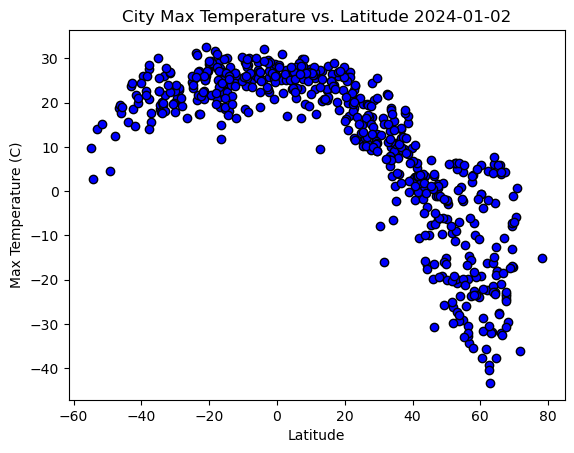

In [12]:
# Build scatter plot for latitude vs. temperature
# 
# Set the axis values
x_axis = city_data_df["Lat"]

y_axis = city_data_df["Max Temp"]
# print(y_axis)

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Max Temperature vs. Latitude 2024-01-02")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

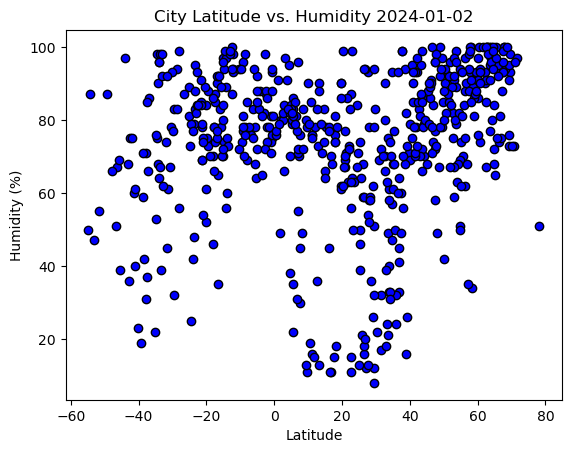

In [13]:
# Build the scatter plots for latitude vs. humidity
# Set the axis values
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity 2024-01-02")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

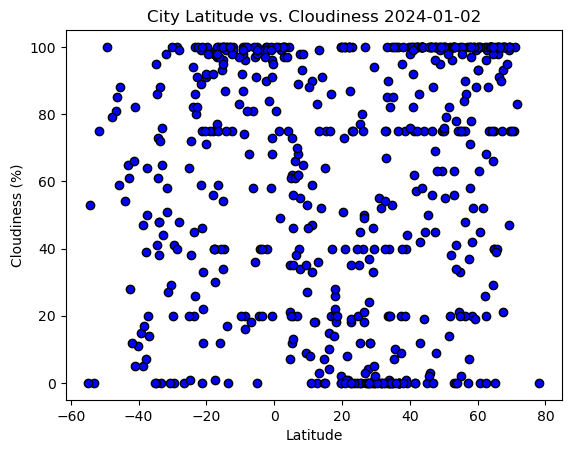

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

# Incorporate the other graph properties
# plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
#             s=x_axis, alpha=0.75)
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness 2024-01-02")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

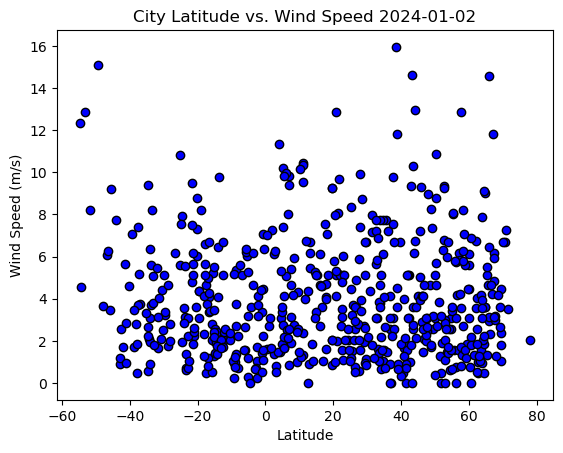

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed 2024-01-02")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def mathy_stuff():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Tiszakécske,46.9326,20.1035,-0.99,84,88,2.10,HU,1705016253
1,Crane,31.3974,-102.3501,16.54,17,0,7.17,US,1705016254
2,Guerrero Negro,27.9769,-114.0611,16.81,58,24,9.94,MX,1705016254
4,La Sarre,48.8002,-79.1996,-19.27,100,95,1.71,CA,1705016254
5,Ribeira Grande,38.5167,-28.7000,15.43,94,75,15.95,PT,1705016254


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Papatowai,-46.5619,169.4708,18.87,51,81,6.05,NZ,1705016254
6,Punta Arenas,-53.1500,-70.9167,14.06,47,0,12.86,CL,1705016239
7,Isangel,-19.5500,169.2667,29.45,73,99,4.36,VU,1705016254
9,Soyo,-6.1349,12.3689,26.29,83,81,2.66,AO,1705016254
11,Grytviken,-54.2811,-36.5092,2.71,87,53,4.54,GS,1705016255


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7276111622387618


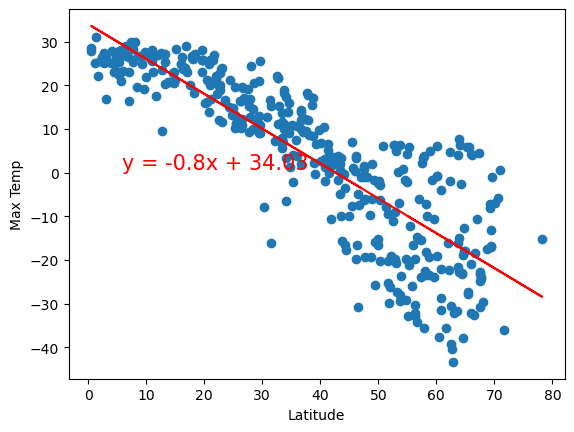

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call function
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
mathy_stuff()


The r-squared is: 0.2807520376840841


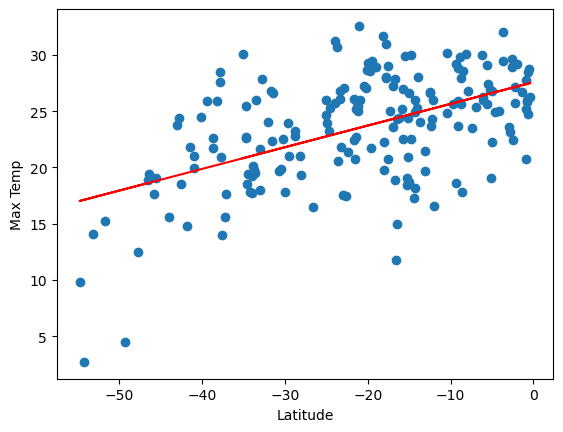

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# Call function
mathy_stuff()

**Discussion about the linear relationship:
There is a strong correlation between the max temperature and the Latitude of the city, and the lower the latitude in the Northern hemisphere, the higher the max temperature.  In the Southern hemisphere, the correlation is not as strong, but the higher the latitude, the higher the max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.14417830239454987


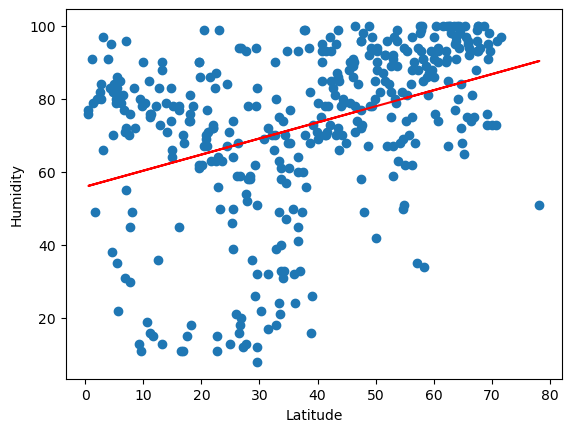

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call function
plt.xlabel("Latitude")
plt.ylabel("Humidity")
mathy_stuff()

The r-squared is: 0.14822215064690214


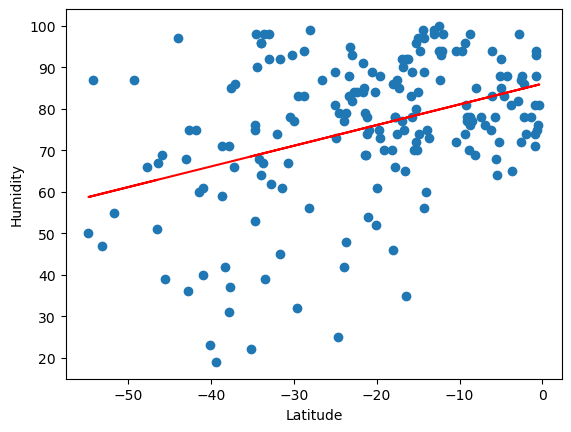

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Call function
mathy_stuff()

**Discussion about the linear relationship:  The correlation between humidity and latitude is less clear.  There are a lot more outliers in both the Northern and Southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.14417830239454987


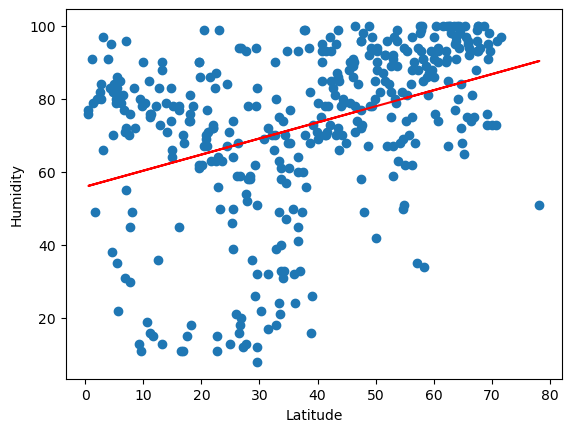

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call function
plt.xlabel("Latitude")
plt.ylabel("Humidity")
mathy_stuff()

The r-squared is: 0.1111801078919214


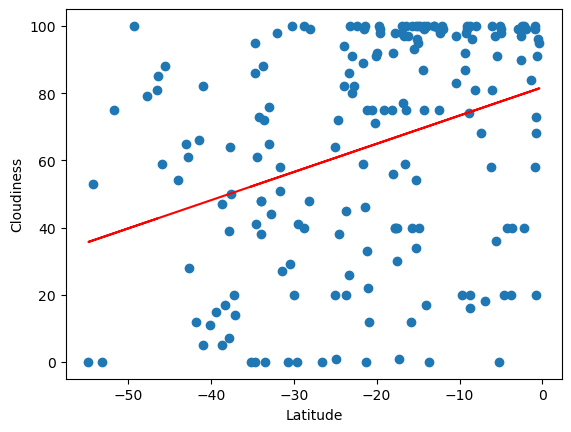

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Call function
mathy_stuff()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003264966806534748


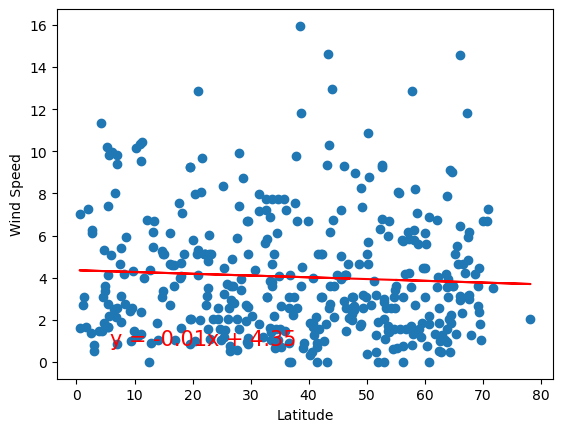

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call function
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
mathy_stuff()

The r-squared is: 0.09159290361832013


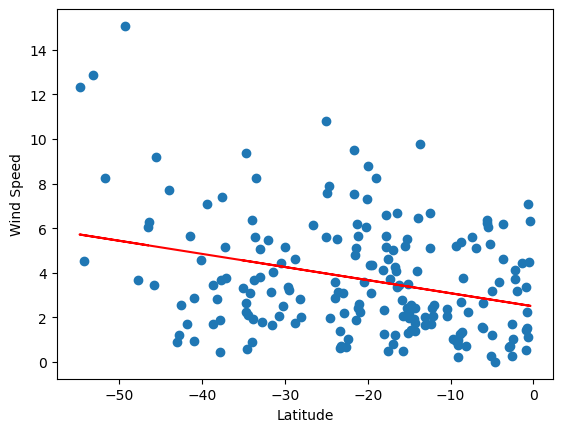

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Call function
mathy_stuff()

**Discussion about the linear relationship:There does not appear to be a correlation of Wind Speed for either the Northern or Southern hemispheres.